# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head(10)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4


In [65]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [66]:
#H0: bachelor compensation = master compensation
#H1: bachelor compensation is different than master compensation

In [67]:
master = df[df['FormalEducation'] == "Master's degree"]['AdjustedCompensation']
bachelor = df[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

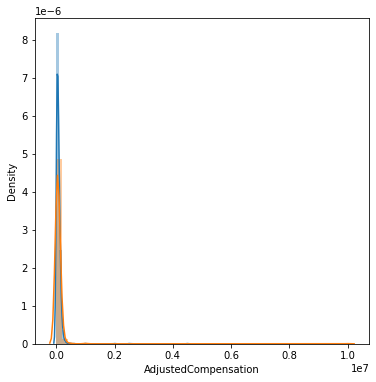

In [68]:
plt.figure(figsize = (6,6))
sns.distplot(master)
sns.distplot(bachelor)

In [69]:
#we can see that there are a lot of outliers

In [70]:
master.describe().apply(lambda x: format(x, 'f'))

count       1990.000000
mean       69139.899871
std       135527.208505
min            0.000000
25%        21868.000000
50%        53812.170000
75%        92000.000000
max      4498900.000000
Name: AdjustedCompensation, dtype: object

In [71]:
bachelor.describe().apply(lambda x: format(x, 'f'))

count       1107.000000
mean       64887.097995
std       306935.872388
min            0.000000
25%        11266.200000
50%        38399.400000
75%        80231.000000
max      9999999.000000
Name: AdjustedCompensation, dtype: object

In [72]:
import flatiron_stats as fs

fs.p_value_welch_ttest(master, bachelor)

0.1813211861492814

In [73]:
#including outliers, p-value is greater than 0.05, hence fail to reject H0

In [74]:
#removing outliers
outliers_threshhold = 500000
master = df[(df['FormalEducation'] == "Master's degree") & (df['AdjustedCompensation'] <= outliers_threshhold)]['AdjustedCompensation']
bachelor = df[(df['FormalEducation'] == "Bachelor's degree") & (df['AdjustedCompensation'] <= outliers_threshhold)]['AdjustedCompensation']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

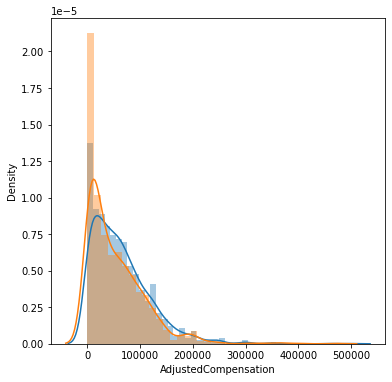

In [75]:
plt.figure(figsize = (6,6))
sns.distplot(master)
sns.distplot(bachelor)

In [76]:
master.describe().apply(lambda x: format(x, 'f'))

count      1985.000000
mean      63976.632818
std       55340.994153
min           0.000000
25%       21868.000000
50%       53539.720000
75%       91000.000000
max      500000.000000
Name: AdjustedCompensation, dtype: object

In [77]:
bachelor.describe().apply(lambda x: format(x, 'f'))

count      1103.000000
mean      53744.350390
std       55285.480940
min           0.000000
25%       11168.300000
50%       38292.150000
75%       80000.000000
max      470000.000000
Name: AdjustedCompensation, dtype: object

In [78]:
#recalculate p-value without outliers
fs.p_value_welch_ttest(master, bachelor)

4.4874583271514723e-07

In [79]:
#without outliers, p-value is smaller than 0.05, hence we reject H0 
#and conclude that the salaries of those with Master's degrees and of those with Bachelor's degrees are statistically different

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [80]:
#Your code here

In [81]:
doctorate = df[df['FormalEducation'] == "Master's degree"]['AdjustedCompensation']
bachelor = df[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

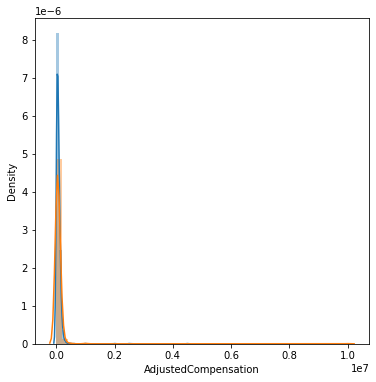

In [82]:
plt.figure(figsize = (6,6))
sns.distplot(doctorate)
sns.distplot(bachelor)

In [83]:
bachelor.describe().apply(lambda x: format(x, 'f'))

count       1107.000000
mean       64887.097995
std       306935.872388
min            0.000000
25%        11266.200000
50%        38399.400000
75%        80231.000000
max      9999999.000000
Name: AdjustedCompensation, dtype: object

In [84]:
doctorate.describe().apply(lambda x: format(x, 'f'))

count       1990.000000
mean       69139.899871
std       135527.208505
min            0.000000
25%        21868.000000
50%        53812.170000
75%        92000.000000
max      4498900.000000
Name: AdjustedCompensation, dtype: object

In [85]:
#p-value without outliers
fs.p_value_welch_ttest(doctorate, bachelor)

0.1813211861492814

In [ ]:
#with outliers, p-value is higher than H0 and we fail to reject H0

In [86]:
#removing outliers
outliers_threshhold = 500000
doctorate = df[(df['FormalEducation'] == "Doctoral degree") & (df['AdjustedCompensation'] <= outliers_threshhold)]['AdjustedCompensation']
bachelor = df[(df['FormalEducation'] == "Bachelor's degree") & (df['AdjustedCompensation'] <= outliers_threshhold)]['AdjustedCompensation']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

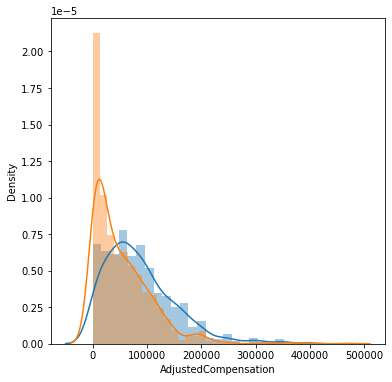

In [87]:
plt.figure(figsize = (6,6))
sns.distplot(doctorate)
sns.distplot(bachelor)

In [88]:
bachelor.describe().apply(lambda x: format(x, 'f'))

count      1103.000000
mean      53744.350390
std       55285.480940
min           0.000000
25%       11168.300000
50%       38292.150000
75%       80000.000000
max      470000.000000
Name: AdjustedCompensation, dtype: object

In [89]:
doctorate.describe().apply(lambda x: format(x, 'f'))

count       964.000000
mean      86194.981631
std       65298.893273
min         -73.516311
25%       39991.200000
50%       73152.770000
75%      120000.000000
max      400000.000000
Name: AdjustedCompensation, dtype: object

In [62]:
#calculate p-value without outliers
fs.p_value_welch_ttest(doctorate, bachelor)

0.0

In [ ]:
#without outliers, p-value is smaller than 0.05, hence we reject H0 
#and conclude that the salaries of those with Doctorate's degrees and of those with Bachelor's degrees are statistically different

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
#Your code here
formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [ ]:
#with outliers, p-value is higher than 0.05, we fail to reject H0

In [93]:
no_outlier_df = df[df['AdjustedCompensation'] <= 500000]
formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, no_outlier_df).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


In [ ]:
#without outliers, p-value is smaller than 0.05, hence we reject H0 
#and conclude that the salaries of those with different formal education are statistically different

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!